# Principal Component Analysis

У нас есть датафрейм размера $n*m$, который образует размерность $D$. Мы хотим преобразовать наши данные в размерность $M, M < D$. В этом состоит задача снижения размерности

Допустим, у нас есть 2D пространство со следующими точками:

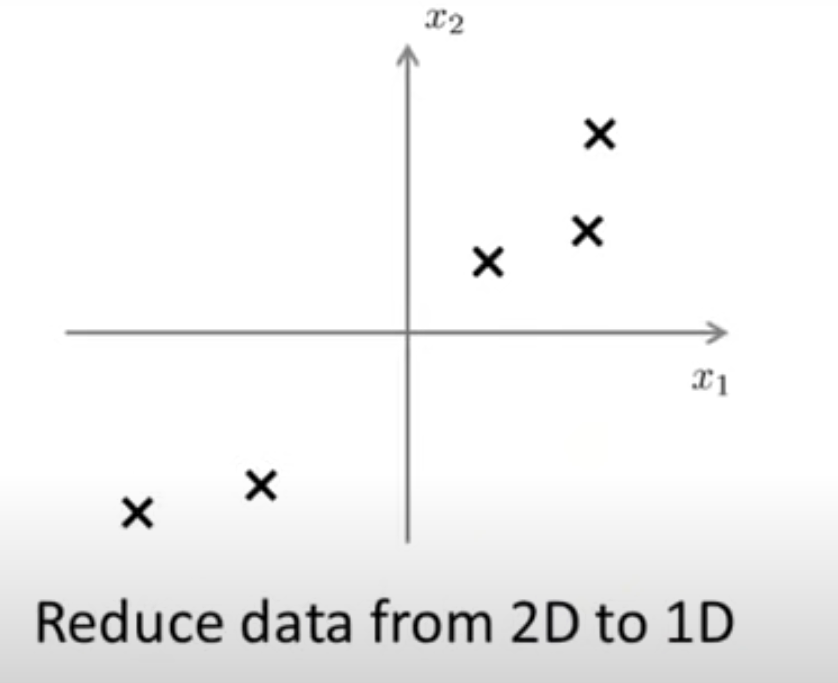

Мы хотим найти такой вектор, на который можно спроецировать все эти точки с минимальным расстоянием:

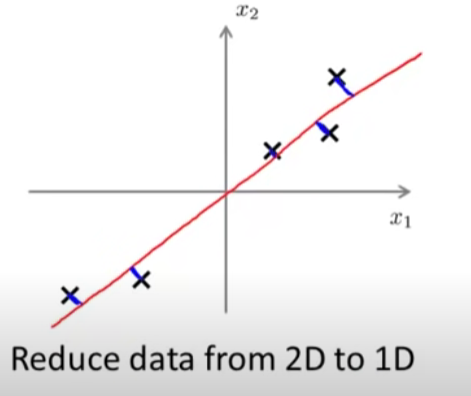

Мы можем заметить, что у этого вектора довольно большая дисперсия. Однако, если мы возьмём другой вектор, то заметим, что дисперсия у него намного меньше:

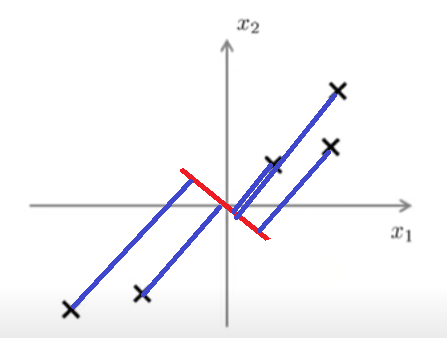

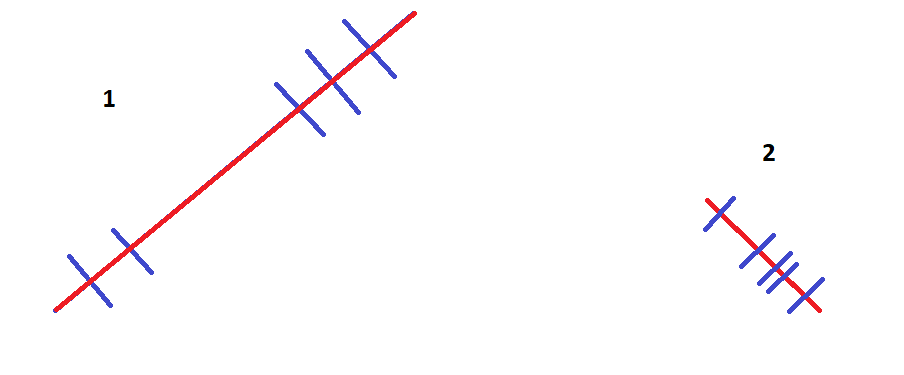

Эта дисперсия, показывает насколько хорошей она сохранилась от исходных данных после снижения размерности. Это будет критерием, как отобрать наилучший вектор. Мы хотим максимизировать дисперсию после снижения размерности. Иначе мы потеряем важную информацию (как например, в случае со 2 вектором)

### Формула

$Proj_{u_1}(x_i) = u_1^T * x_i * u$, где u - единичный вектор

$u_1^T * x̄ * u =$ **Mean of projections**

**Variance of projections:**

$\frac{1}{N} Σ_{i=1}^N (u_1^T * x_i - u_1^T * x̄)^2 = $

$\frac{1}{N} Σ_{i=1}^N [u_1^T(x_i - x̄)]^2 = $

$\frac{1}{N} Σ_{i=1}^N u_1^T(x_i - x̄)*(x_i - x̄)^Tu_1 = $

$u_1^T[\frac{1}{N} Σ_{i=1}^N (x_i - x̄)*(x_i - x̄)^T]u_1 = $

$u_1^T * S * u_1 → max$

где S - матрица ковариации

$u_1^T * u_1 = 1$

Получим новое выражение:

$u_1^T * S * u_1 + λ(1-u_1^T * u_1)$

$\frac{∂}{∂ u_1} = 2Su_1 - λ2u_1 = 0$

$Su_1  = λu_1$

$u_1^TSu_1 = λu_1^Tu_1$

$u_1^TSu_1 = λ$

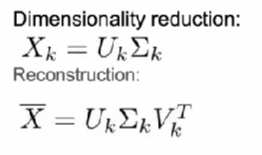

где $U_k$ - отсортированный эйген-вектор с эйген-величинами

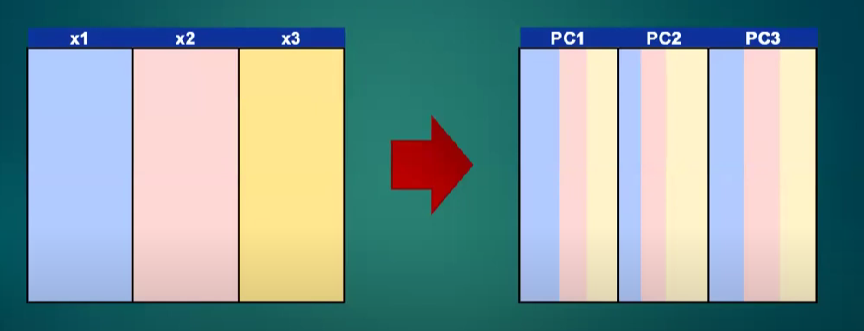

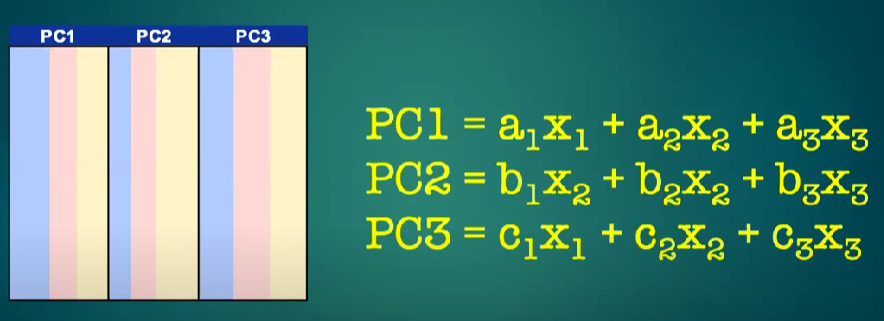

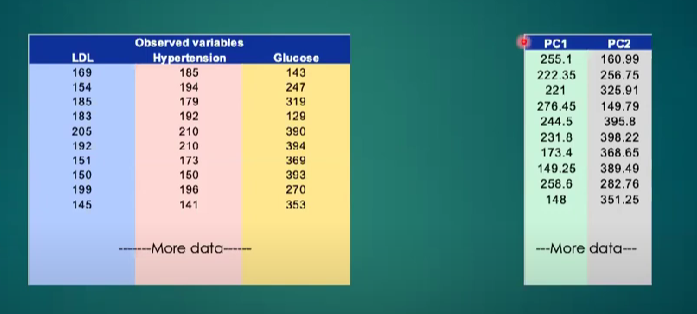

## Пример

In [1]:
import pandas as pd 
from sklearn import datasets
 
iris = datasets.load_iris()
 
target_names = {
    0:'setosa',
    1:'versicolor', 
    2:'virginica'
}
 
df = pd.DataFrame(
    iris.data, 
    columns=iris.feature_names
    )
 
df['target'] = iris.target
df['target_names'] = df['target'].map(target_names)

In [2]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


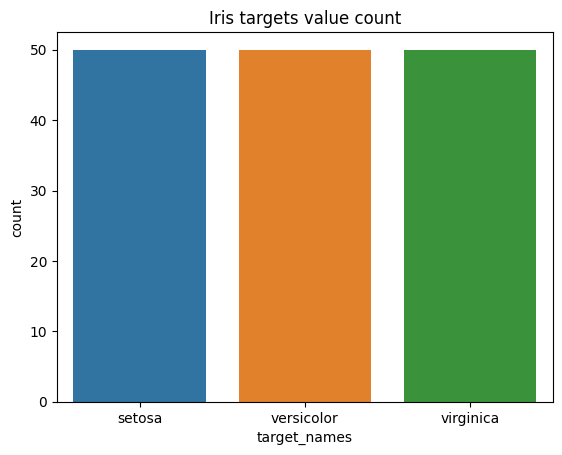

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns 
 
sns.countplot(
    x='target_names', 
    data=df)
plt.title('Iris targets value count')
plt.show()

In [4]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
x_scaled = StandardScaler().fit_transform(X)

In [7]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components=3)
 
pca_features = pca.fit_transform(x_scaled)
 
print('Shape before PCA: ', x_scaled.shape)
print('Shape after PCA: ', pca_features.shape)
 
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2', 'PC3'])

Shape before PCA:  (150, 4)
Shape after PCA:  (150, 3)


In [8]:
pca_df

,PC1,PC2,PC3
0,-2.264703,0.480027,-0.127706
1,-2.080961,-0.674134,-0.234609
2,-2.364229,-0.341908,0.044201
3,-2.299384,-0.597395,0.091290
4,-2.389842,0.646835,0.015738
...,...,...,...
145,1.870503,0.386966,0.256274
146,1.564580,-0.896687,-0.026371
147,1.521170,0.269069,0.180178
148,1.372788,1.011254,0.933395


In [9]:
target_names = {
    0:'setosa',
    1:'versicolor', 
    2:'virginica'
}
 
pca_df['target'] = y
pca_df['target'] = pca_df['target'].map(target_names)
 
pca_df

,PC1,PC2,PC3,target
0,-2.264703,0.480027,-0.127706,setosa
1,-2.080961,-0.674134,-0.234609,setosa
2,-2.364229,-0.341908,0.044201,setosa
3,-2.299384,-0.597395,0.091290,setosa
4,-2.389842,0.646835,0.015738,setosa
...,...,...,...,...
145,1.870503,0.386966,0.256274,virginica
146,1.564580,-0.896687,-0.026371,virginica
147,1.521170,0.269069,0.180178,virginica
148,1.372788,1.011254,0.933395,virginica


In [10]:
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182])

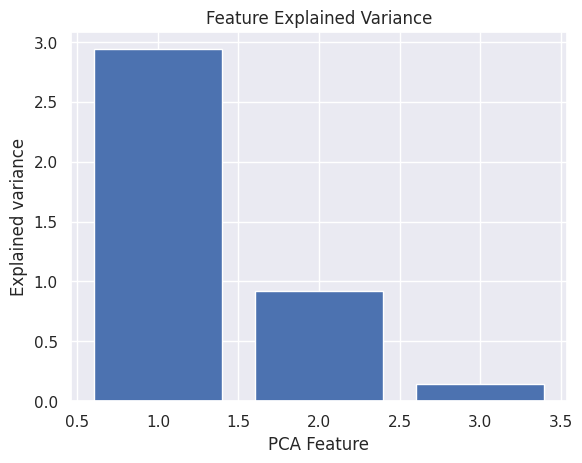

In [11]:
import matplotlib.pyplot as plt 
 
from sklearn.decomposition import PCA
sns.set()
 
pca = PCA(n_components=3)

pca.fit_transform(x_scaled)
 
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

Можно снизить до 2 размерностей, 3 имеет несильную важность

In [12]:
import pandas as pd
from sklearn.decomposition import PCA
 
pca = PCA(n_components=2)
 
pca_features = pca.fit_transform(x_scaled)
 
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2'])
    
target_names = {
    0:'setosa',
    1:'versicolor', 
    2:'virginica'
}
 
pca_df['target'] = y
pca_df['target'] = pca_df['target'].map(target_names)
 
pca_df.head()

,PC1,PC2,target
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


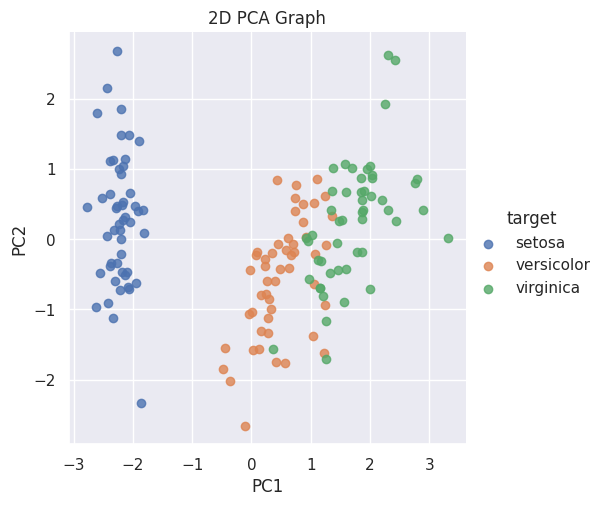

In [13]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
 
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df, 
    hue='target', 
    fit_reg=False, 
    legend=True
    )
 
plt.title('2D PCA Graph')
plt.show()